# Opgave uge 11 - doner blod
Din opgave er, at forudsige, om en bruger vil donere i marts måned 2007 alene baseret på hans historik (som ligger før marts 2007).

Følgende kolonner er indeholdt i datasættet:
- Months since Last Donation: this is the number of monthis since this donor's most recent donation.
- Number of Donations: this is the total number of donations that the donor has made.
- Total Volume Donated: this is the total amound of blood that the donor has donated in cubuc centimeters.
- Months since First Donation: this is the number of months since the donor's first donation.

Brug følgende metoder til at løse opgaven:
- Forward Stepwise variable selection
- Lav AUC train and test curves (hvor skal dit cutoff ligge?)

In [90]:
import pandas as pd
blood_train = pd.read_csv('blood-train.csv', index_col=0 )
blood_test = pd.read_csv('blood-test.csv', index_col=0)
blood_format = pd.read_csv('blood-format.csv')
blood_train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [91]:
target = 'Made Donation in March 2007'
drop_columns = 'Months since First Donation'
X = blood_train.drop(columns=[drop_columns], axis=1).drop(target, axis=1)
blood_test.drop(columns=drop_columns, axis=1) 
print(X)

     Months since Last Donation  Number of Donations  \
619                           2                   50   
664                           0                   13   
441                           1                   16   
160                           2                   20   
358                           1                   24   
..                          ...                  ...   
698                          23                    1   
433                          16                    3   
360                          21                    2   
541                          39                    1   
74                           72                    1   

     Total Volume Donated (c.c.)  
619                        12500  
664                         3250  
441                         4000  
160                         5000  
358                         6000  
..                           ...  
698                          250  
433                          750  
360         

In [92]:
y = blood_train['Made Donation in March 2007'].values

In [93]:
from sklearn.linear_model import LogisticRegression
rfc = LogisticRegression()
rfc.fit(X,y)
#pred = rfc.predict_proba(blood_test)
#pred_done = pred[:,1]
pred_train = rfc.predict_proba(X)
pred_train_done = pred_train[:,1]

In [89]:
from sklearn.metrics import log_loss
loss_pred = log_loss(y,pred_train_done)
print(loss_pred)

0.4909409020707483


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

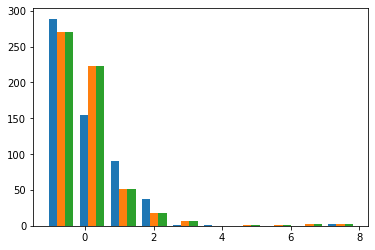

In [112]:
import matplotlib.pyplot as plt
#X_transformed.plot(kind='hist')
plt.hist(X_transformed)
plt.show()

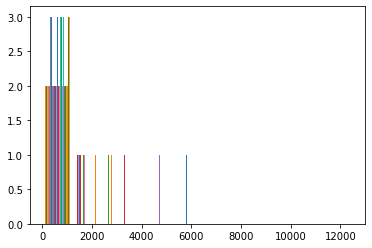

In [113]:
plt.hist(X)
plt.show()